In [1]:
# Assignment 1

# Importing relevant packages
import numpy as np

# Choosing parametervalues
m = 1
v = 10
eps = 0.3
t0 = 0.4
t1 = 0.1
k = 0.4
w = 1
T = 10000

# Defining the utility functon with the given restrictions on c and l
def lab_sup(l, m, v, eps, t0, t1, k):
    c = m + w*l - (t0*w*l + t1*np.fmax(w*l - k, 0))
    if 0<=l<=1:
        utility = np.log(c)-(v*(l**(1+(1/eps)))/(1+(1/eps)))
    else:
        utility = -np.inf
    return utility

# Importing optimization tool
from scipy import optimize

# Making lab_sup a function of only l 
obj = lambda l: -lab_sup(l, m, v, eps, t0, t1,  k)

# Calling minimizer
solution = optimize.minimize(obj, 0.5)

# Getting the results
l = solution.x
c = m + w*l - (t0*w*l + t1*np.fmax(w*l - k, 0))
u = lab_sup(l, c, v, eps, t0, t1, k)

# Printing results
print('The optimal labor is',':',l)
print('The optimal consumption is',':',c)
print('The optimal utility is',':',u)

The optimal labor is : [0.39999999]
The optimal consumption is : [1.23999999]
The optimal utility is : [0.34851383]


<function matplotlib.pyplot.show(*args, **kw)>

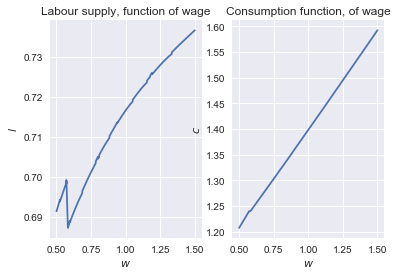

In [16]:
# Assignment 2

# Importing relevant packages
import matplotlib.pyplot as plt
%matplotlib inline

# Defining consumption as functoin of l and w 
c_func = lambda l, w: m + w*l - (t0*w*l + t1 * max([w*l - k,0]))

# Setting up w, l, c and N
N = 10000

w_vec = np.linspace(0.5,1.5,N)
l_vec = np.empty(N)
c_vec = np.empty(N)

# Defining the vector for w
for i,w in enumerate(w_vec):
    int_g = 0.5
    obj_2 = optimize.minimize(
        lambda l: -lab_sup(l, m, v, eps, t0, t1, k), int_g, method='SLSQP',bounds=((0,1),))
    l_vec[i] = obj_2.x
    c_vec[i] = c_func(l_vec[i],w)
 
# Making the plots of consumption and labor
fig = plt.figure()

# Labor graph
ax_l = fig.add_subplot(1, 2, 1)
ax_l.plot(w_vec,l_vec)
ax_l.set_title('Labour supply, function of wage')
ax_l.set_xlabel('$w$')
ax_l.set_ylabel('$l$')

# Consumption graph
ax_c = fig.add_subplot(1, 2, 2)
ax_c.plot(w_vec, c_vec)
ax_c.set_title('Consumption function, of wage')
ax_c.set_xlabel('$w$')
ax_c.set_ylabel('$c$')

plt.show

In [9]:
# Assignment 3

# Defining the tax revenue function
def tax(w_vec, l_vec, t0, t1, k):
    tax_rev = np.sum(t0*w_vec*l_vec + t1*np.max(w_vec*l_vec - k, 0))
    return tax_rev

# Printing the result
print('Total tax revenue is',':',tax(w_vec, l_vec, t0, t1, k))

Total tax revenue is : 1806.4887612453426


In [10]:
# Assignment 4

# Giving epsilon new value
eps = 0.1

# Setting up new c, l and w
c_v = np.empty(N)
l_v = np.empty(N)
w_v = np.linspace(0.5,1.5,N)

# Making new wagerate function
for i, w in enumerate(w_v):
    int_g = 0.5
    obj_3 = optimize.minimize(lambda l: -lab_sup(l, m, v, eps, t0, t1, k), int_g, method = 'SLSQP', bounds=((0,1),))
    
    # Getting the results
    l_v[i] = obj_3.x
    c_v[i] = c_func(l_v[i], w)

# Defining the new tax revenue function   
def new_tax_eps(w_vec, l_v, t0, t1, k):
    new_tax_rev_eps = np.sum(t0*w_vec*l_v + t1*np.max(w_vec*l_v - k, 0))
    return new_tax_rev_eps

# Printing the result
print('New tax reveneue with eps = 0.1', ':', new_tax_eps(w_vec, l_v, t0, t1, k))    

New tax reveneue with eps = 0.1 : 3580.566225159515


In [17]:
# Assignment 5

# Redefining the consumption function
def new_c(x):
    w = x[0]
    l = x[1]
    t0 = x[2]
    t1 = x[3]
    k = x[4]
    return m + x[0]*x[1] - (x[2]*x[0]*x[1] + x[3] * np.max([x[0]*x[1] - x[4],0]))

# Defining the tax function
def new_tax_opt(x):
    w = x[0]
    l = x[1]
    t0 = x[2]
    t1 = x[3]
    k = x[4]
    new_tax_rev_opt = np.sum(x[2]*x[0]*x[1] + x[3]*np.max(x[0]*x[1]-x[4],0))
    return -new_tax_rev_opt

# Setting up conditions for optimization
x0 = [1, 1, 1, 1, 1]
constraints = ({"type":"ineq","fun":new_c})

# Calling the minimizer
new_obj = optimize.minimize(new_tax_opt, x0, bounds=((0.5,1.5),(0,1),(0,1),(0,1),(0,1)),constraints=constraints, method='SLSQP')

# Getting the results
w_opt = new_obj.x[0]
l_opt = new_obj.x[1]
t0_opt = new_obj.x[2]
t1_opt = new_obj.x[3]
k_opt = new_obj.x[4]
c_opt = new_c(new_obj.x)
tax_revenue_opt = new_tax_eps(w_vec,l_vec,t0_opt,t1_opt,k_opt)

# Printing results
print("Optimal standard labor income tax is", ':', t0_opt)
print("Optimal top bracket labor income tax is", ':', t1_opt)
print("Optimal cut-off for top labor income bracket tax is", ':', k_opt)
print("Optimal tax revenue is", ':', tax_revenue_opt)

Optimal standard labor income tax is : 0.9259741409926628
Optimal top bracket labor income tax is : 0.9592130246396214
Optimal cut-off for top labor income bracket tax is : 0.34171840876261966
Optimal tax revenue is : 13978.030442211362
